# Fire distirbution by confidence

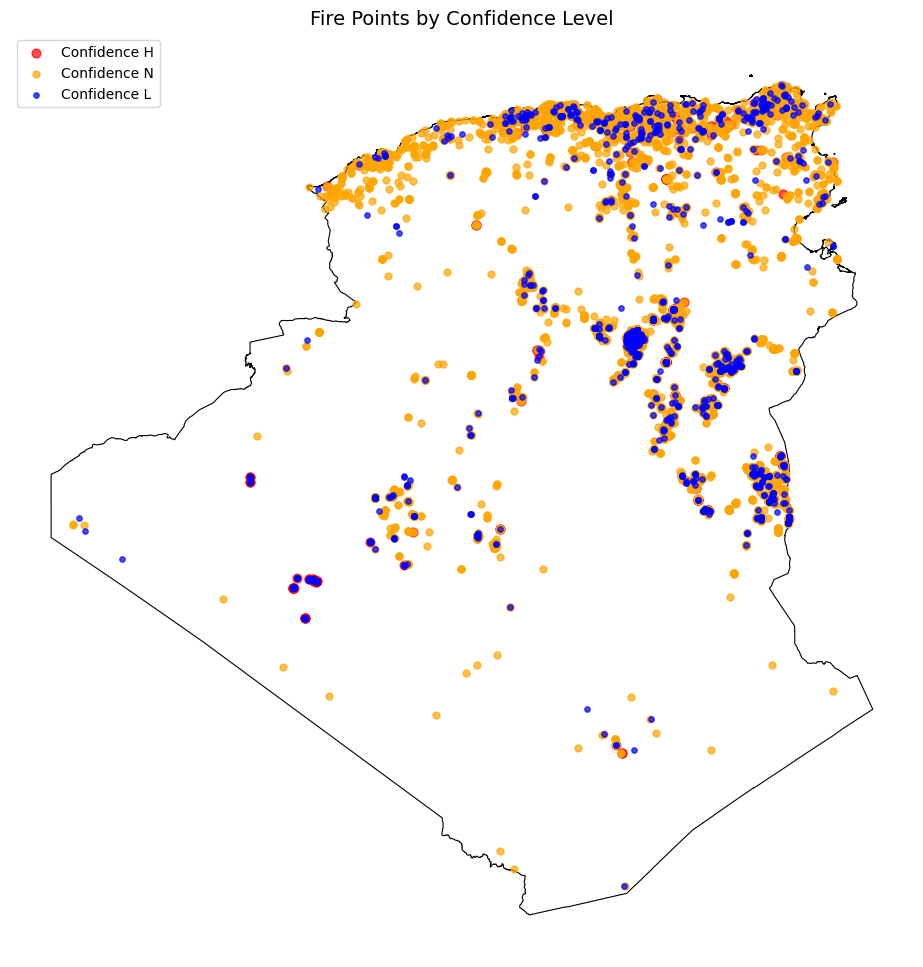

In [1]:
# ===============================
# Fire points by confidence level
# ===============================

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# -------------------------------
# File paths
# -------------------------------
fire_csv = "/content/drive/MyDrive/data_set/fire/fire_vege.csv"
contour_geojson = "/content/drive/MyDrive/data_set/kontur/contour.geojson"

# -------------------------------
# Load fire CSV
# -------------------------------
fire_df = pd.read_csv(fire_csv)

# Expected columns: longitude, latitude, confidence
fire_gdf = gpd.GeoDataFrame(
    fire_df,
    geometry=gpd.points_from_xy(
        fire_df["longitude"],
        fire_df["latitude"]
    ),
    crs="EPSG:4326"
)

# -------------------------------
# Load contour GeoJSON
# -------------------------------
contour_gdf = gpd.read_file(contour_geojson)

# Ensure same CRS
contour_gdf = contour_gdf.to_crs(fire_gdf.crs)

# -------------------------------
# Color mapping for confidence
# -------------------------------
confidence_colors = {
    "h": "red",     # high confidence
    "n": "orange",  # nominal confidence
    "l": "blue"     # low confidence
}

# Marker sizes
confidence_sizes = {
    "h": 40,
    "n": 25,
    "l": 15
}

# -------------------------------
# Plot
# -------------------------------
fig, ax = plt.subplots(figsize=(12, 12))

# Plot contour
contour_gdf.plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    linewidth=0.8
)

# Plot fire points by confidence
for conf in ["h", "n", "l"]:
    subset = fire_gdf[fire_gdf["confidence"] == conf]
    subset.plot(
        ax=ax,
        color=confidence_colors[conf],
        markersize=confidence_sizes[conf],
        label=f"Confidence {conf.upper()}",
        alpha=0.7
    )

# -------------------------------
# Final styling
# -------------------------------
ax.set_title("Fire Points by Confidence Level", fontsize=14)
ax.legend()
ax.set_axis_off()

plt.show()


# Desert fire analysis

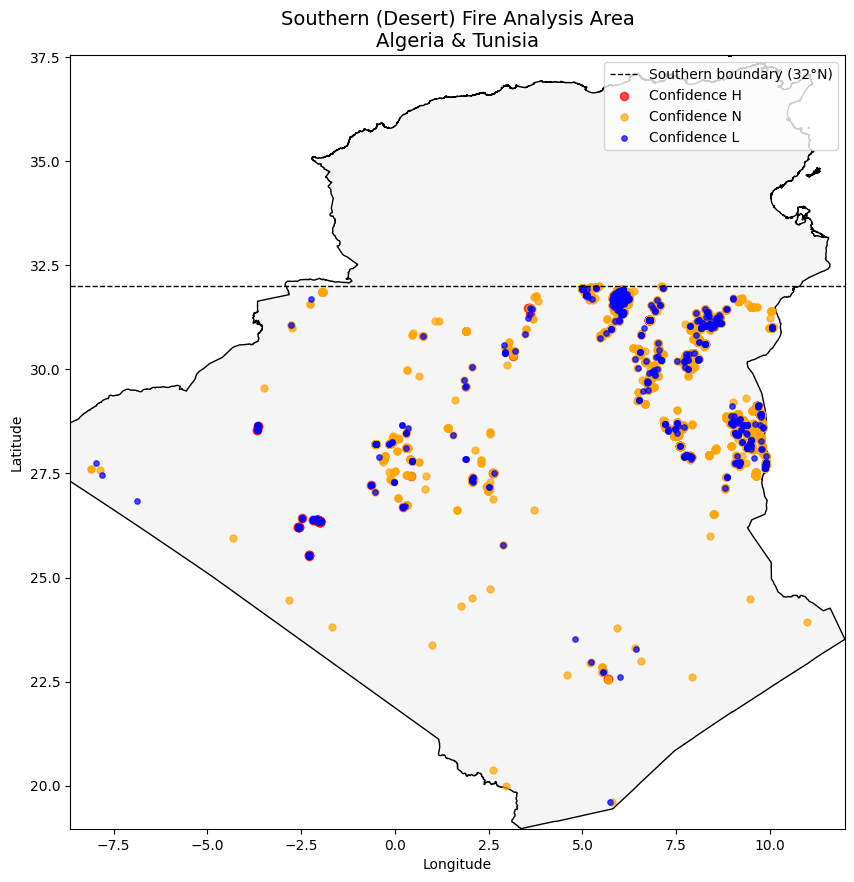

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd

# -------------------------------------
# Color mapping
# -------------------------------------
confidence_colors = {
    "h": "red",
    "n": "orange",
    "l": "blue"
}

confidence_sizes = {
    "h": 35,
    "n": 25,
    "l": 15
}

# -------------------------------------
# Plot
# -------------------------------------
fig, ax = plt.subplots(figsize=(10, 12))

# Plot Algeria + Tunisia
contour_gdf.plot(
    ax=ax,
    facecolor="#f5f5f5",
    edgecolor="black",
    linewidth=1
)

# Plot latitude threshold (desert limit)
ax.axhline(
    y=32,
    color="black",
    linestyle="--",
    linewidth=1,
    label="Southern boundary (32°N)"
)

# Plot southern fires only
for conf in ["h", "n", "l"]:
    subset = south_fires[south_fires["confidence"] == conf]
    subset.plot(
        ax=ax,
        color=confidence_colors[conf],
        markersize=confidence_sizes[conf],
        label=f"Confidence {conf.upper()}",
        alpha=0.7
    )

# -------------------------------------
# Styling
# -------------------------------------
ax.set_title(
    "Southern (Desert) Fire Analysis Area\nAlgeria & Tunisia",
    fontsize=14
)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.legend()
ax.set_xlim(contour_gdf.total_bounds[0], contour_gdf.total_bounds[2])
ax.set_ylim(contour_gdf.total_bounds[1], contour_gdf.total_bounds[3])

plt.show()


Total southern fires: 9773


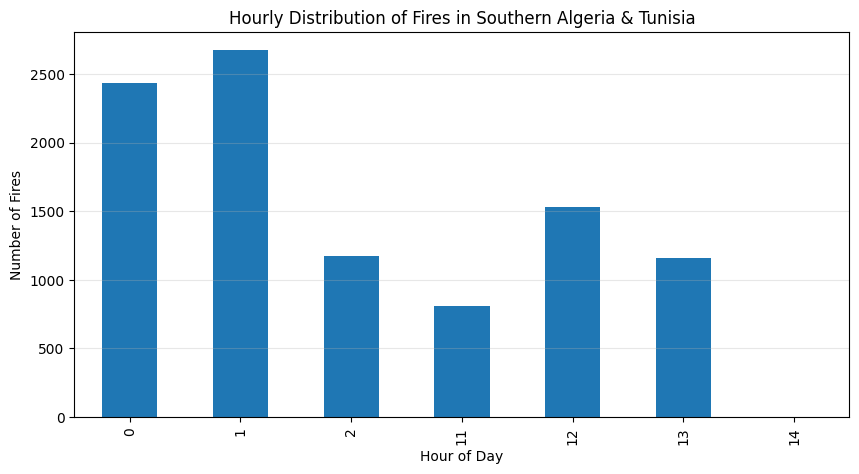

In [3]:
# =====================================
# Southern Fires Temporal Analysis
# Algeria + Tunisia
# =====================================

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# -------------------------------------
# Paths
# -------------------------------------
fire_csv = "/content/drive/MyDrive/data_set/fire/fire_vege.csv"
contour_geojson = "/content/drive/MyDrive/data_set/kontur/contour.geojson"

# -------------------------------------
# Load fire data
# -------------------------------------
df = pd.read_csv(fire_csv)

# Convert to GeoDataFrame
fire_gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# -------------------------------------
# Load Algeria + Tunisia contour
# -------------------------------------
contour_gdf = gpd.read_file(contour_geojson)
contour_gdf = contour_gdf.to_crs(fire_gdf.crs)

# -------------------------------------
# Keep fires inside Algeria + Tunisia
# -------------------------------------
fire_gdf = gpd.sjoin(
    fire_gdf,
    contour_gdf,
    how="inner",
    predicate="within"
)

# -------------------------------------
# Select ONLY southern fires
# (south of 32°N)
# -------------------------------------
south_fires = fire_gdf[fire_gdf.latitude < 32].copy()

print(f"Total southern fires: {len(south_fires)}")

# -------------------------------------
# Time processing
# -------------------------------------
# Convert date
south_fires["acq_date"] = pd.to_datetime(south_fires["acq_date"])



# Convert acquisition time (HHMM → hour)
south_fires["hour"] = south_fires["acq_time"].astype(str).str.zfill(4).str[:2].astype(int)




# -------------------------------------
# Hourly fire distribution
# -------------------------------------
hourly_counts = south_fires["hour"].value_counts().sort_index()

plt.figure(figsize=(10,5))
hourly_counts.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Fires")
plt.title("Hourly Distribution of Fires in Southern Algeria & Tunisia")
plt.grid(axis="y", alpha=0.3)
plt.show()


In [5]:
# -------------------------------------
# Filter fires at hours 0, 1, 2
# -------------------------------------
night_fires = south_fires[south_fires["hour"].isin([0, 1, 2])]

# -------------------------------------
# Print confidence values
# -------------------------------------
# print("Confidence values for fires at hours 0, 1, 2:\n")
# print(night_fires[["acq_date", "hour", "confidence"]])

# Count confidence levels at hours 0–2
confidence_counts = (
    night_fires["confidence"]
    .value_counts()
)

print("\nConfidence distribution (hours 0–2):")
print(confidence_counts)



Confidence distribution (hours 0–2):
confidence
n    6194
h      82
Name: count, dtype: int64


In [7]:
# -------------------------------------
# Fires occurring at hours 0, 1, 2
# -------------------------------------
night_fires = south_fires[south_fires["hour"].isin([0, 1, 2])].copy()

# Extract month (already datetime, but safe)
night_fires["month"] = night_fires["acq_date"].dt.month

# -------------------------------------
# Count fires per month
# -------------------------------------
month_counts = night_fires["month"].value_counts().sort_index()

print("Monthly distribution of fires at hours 0–2:\n")
print(month_counts)


Monthly distribution of fires at hours 0–2:

month
1     461
2     376
3     533
4     367
5     616
6     438
7     584
8     449
9     424
10    815
11    654
12    559
Name: count, dtype: int64
